<a href="https://colab.research.google.com/github/SaiVarma98/Basic_preceptron_training/blob/main/Artificial_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf 
import numpy as np #helper Library
import matplotlib.pyplot as plt 

In [3]:
fs_minst = tf.keras.datasets.fashion_mnist.load_data()


4431872/4422102 [==============================] - 0s 0us/step


In [4]:
fs_minst

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [5]:
(train_images,train_labels),(test_images,test_labels) = fs_minst

In [6]:
class_names=['T-Shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
test_labels.shape

(10000,)

In [9]:
type(train_labels)
li=[]
for i in train_labels:
    li.append(class_names[i])
train_names=np.array(li)
train_names

array(['Ankle Boot', 'T-Shirt/Top', 'T-Shirt/Top', ..., 'Dress',
       'T-Shirt/Top', 'Sandal'], dtype='<U11')

In [10]:
type(test_labels)
li=[]
for i in test_labels:
    li.append(class_names[i])
test_names=np.array(li)
test_names

array(['Ankle Boot', 'Pullover', 'Trouser', ..., 'Bag', 'Trouser',
       'Sandal'], dtype='<U11')

In [11]:
train_names

array(['Ankle Boot', 'T-Shirt/Top', 'T-Shirt/Top', ..., 'Dress',
       'T-Shirt/Top', 'Sandal'], dtype='<U11')

In [12]:
test_names

array(['Ankle Boot', 'Pullover', 'Trouser', ..., 'Bag', 'Trouser',
       'Sandal'], dtype='<U11')

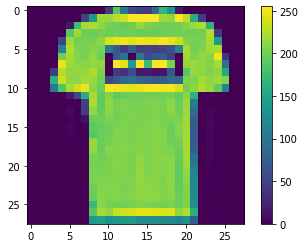

In [13]:
#plotting an image
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.show()

In [14]:
#Since pixel values are ranging b/w 0 to 255.Need normalize 
train_images=train_images/255
test_images=test_images/255

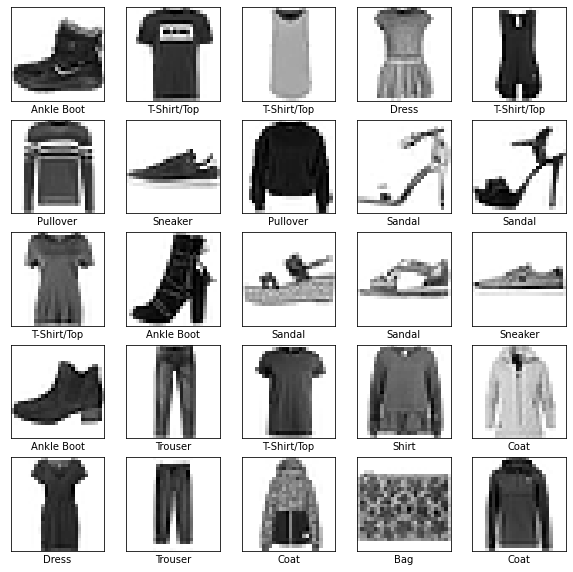

In [15]:
plt.figure(figsize=(10,10))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(train_names[i])
plt.show()

In [16]:
# Building neural network architecture

model=tf.keras.Sequential([
                        
                        tf.keras.layers.Flatten(input_shape=(28,28)),#input layer #Flatter a2d array into single dimensional array
                        tf.keras.layers.Dense(128,activation='relu'),#hidden layer
                        tf.keras.layers.Dense(10)#output layer

    ])

In [17]:
# Compile the model adam is most advanced Optimizer

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])


In [18]:
#train the model

model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.4977 - accuracy: 0.8245
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3747 - accuracy: 0.8654
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3349 - accuracy: 0.8780
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3121 - accuracy: 0.8841
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2933 - accuracy: 0.8919
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2805 - accuracy: 0.8963
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2573 - accuracy: 0.9032
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2487 - accuracy: 0.9066
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2383 - accuracy: 0.9102


In [19]:
# Evaluate the model using test data

test_loss,test_acc=model.evaluate(test_images,test_labels)

test_acc

313/313 [==============================] - 1s 3ms/step - loss: 0.3688 - accuracy: 0.8771


0.8770999908447266

In [24]:
#can add softmaxlayer at the end to get the predictions in probability distribution

In [20]:
predictions=model.predict(test_images)

In [21]:
predictions[0]

array([ -6.2228985 , -20.23575   , -12.464616  , -20.02209   ,
       -11.907752  ,   0.41677806,  -6.9302464 ,  -0.9581387 ,
        -8.210317  ,   4.8425226 ], dtype=float32)

In [23]:
class_names[np.argmax(predictions[0])]

'Ankle Boot'